**MLAI Assignment 01**

The diabetes dataset is given. The objective is to predict based on diagnostic
measurements whether a patient has diabetes.

Dataset description

• Pregnancies: To express the Number of pregnancies

• Glucose: To express the Glucose level in blood

• BloodPressure: To express the Blood pressure measurement

• SkinThickness: To express the thickness of the skin

• Insulin: To express the Insulin level in blood

• BMI: To express the Body mass index

• DiabetesPedigreeFunction: To express the Diabetes percentage

• Age: To express the age

• Outcome: To express the final result 1 is YES o is NO

Note : The zeros in the dataset are actually nan values. Treat zeros as nan and
impute them using any suitable methods


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Datasets MLAI/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

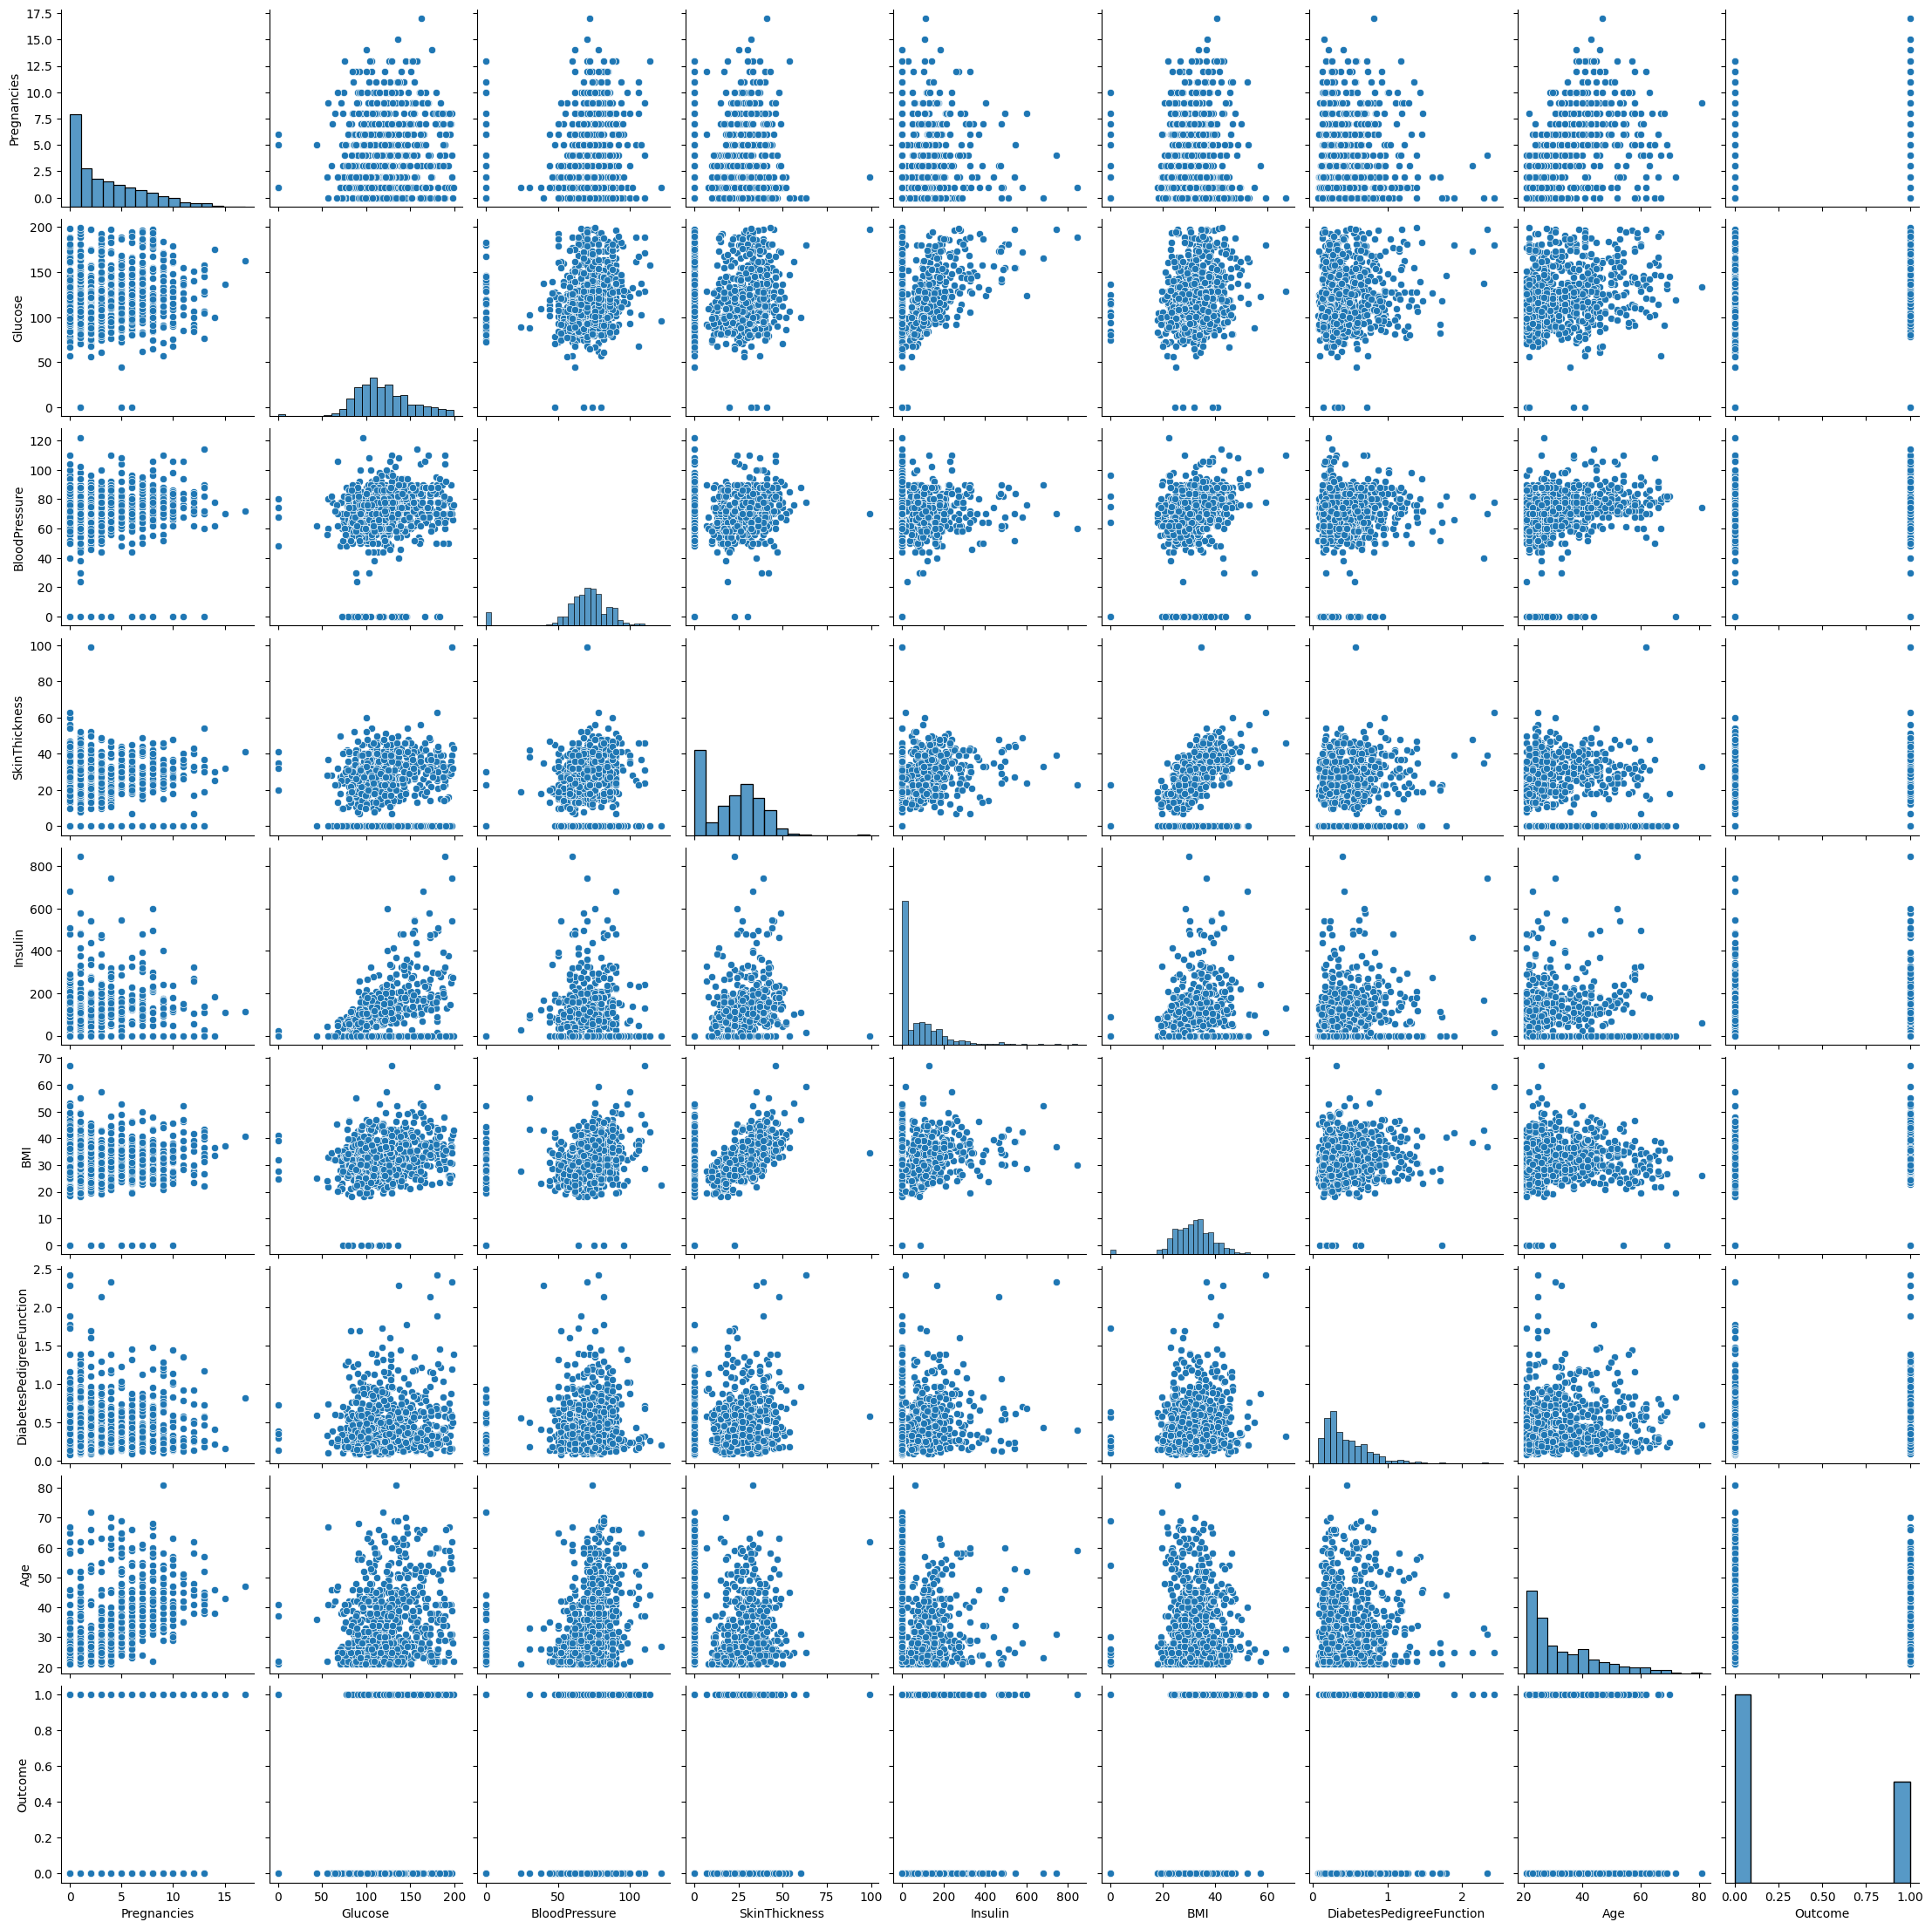

In [7]:
sns.pairplot(data)

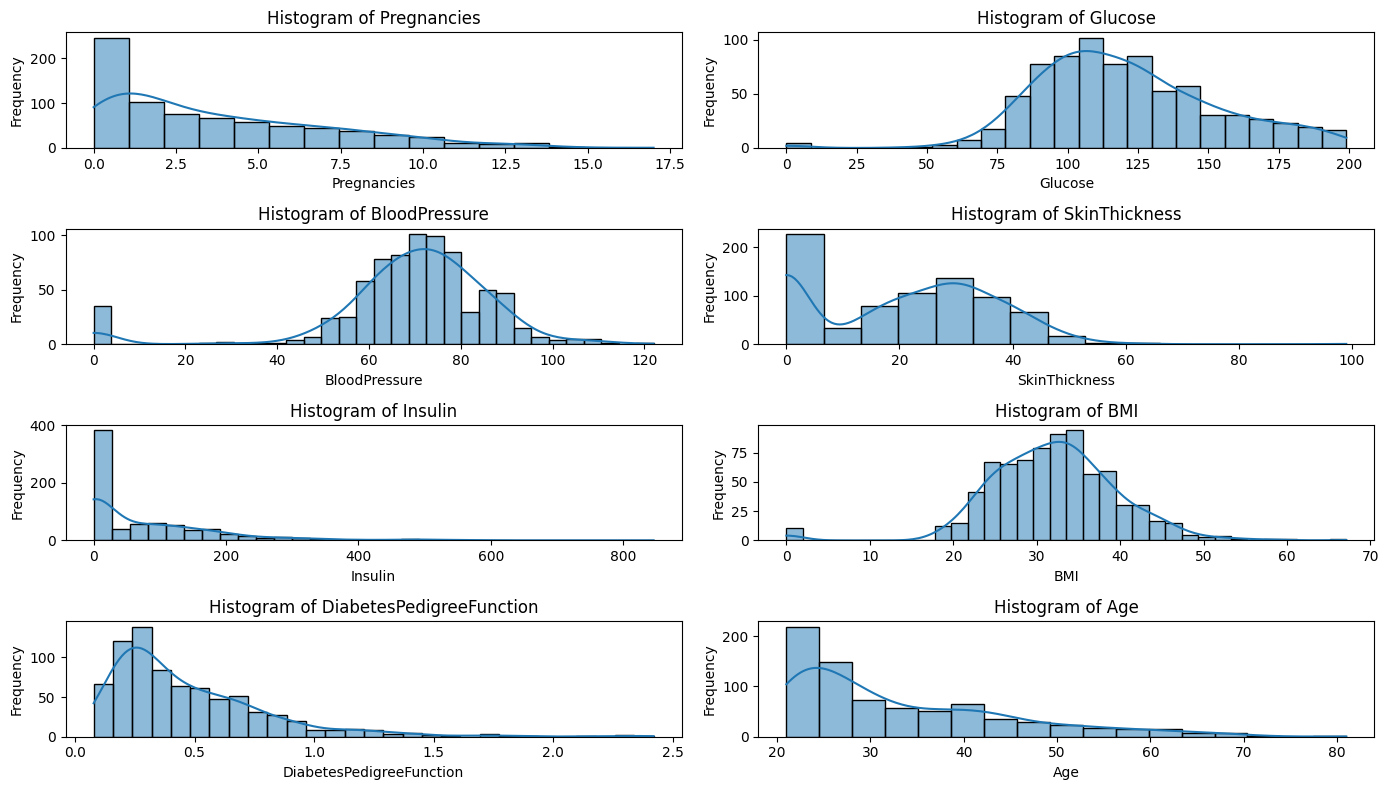

In [8]:
fig, axes = plt.subplots(4,2, figsize=(14, 8))
axes = axes.flatten()

# Plot each variable in a subplot
for i, column in enumerate(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]):
    ax = axes[i]
    sns.histplot(data[column], kde=True, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout and display the grid of plots
plt.tight_layout()
plt.show()

**Zeros in the dataset are Nan Values.Zeros needs to be imputed**

In [9]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]=data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,np.NaN)


In [11]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [12]:
data.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**Imputing the null values with KNN Imputer**

In [13]:
from sklearn.impute import KNNImputer

In [14]:
knn=KNNImputer(n_neighbors=10,weights='distance')

In [15]:
data=knn.fit_transform(data)

In [16]:
data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [17]:
data=pd.DataFrame(data)

In [18]:
data.columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [19]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,196.233760,33.6,0.627,50.0,1.0
1,1.000000,85.0,66.0,29.000000,67.427173,26.6,0.351,31.0,0.0
2,8.000000,183.0,64.0,26.869613,192.231916,23.3,0.672,32.0,1.0
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,5.184164,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
764,2.000000,122.0,70.0,27.000000,159.398354,36.8,0.340,27.0,0.0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
766,1.000000,126.0,60.0,30.193127,138.888105,30.1,0.349,47.0,1.0


In [20]:
data['Outcome'].dtypes

dtype('float64')

In [21]:
data['Outcome']=data['Outcome'].astype(int)

In [22]:
data['Pregnancies']=data['Pregnancies'].astype(int)

In [23]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,196.233760,33.6,0.627,50.0,1
1,1,85.0,66.0,29.000000,67.427173,26.6,0.351,31.0,0
2,8,183.0,64.0,26.869613,192.231916,23.3,0.672,32.0,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0
4,5,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0
764,2,122.0,70.0,27.000000,159.398354,36.8,0.340,27.0,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0
766,1,126.0,60.0,30.193127,138.888105,30.1,0.349,47.0,1


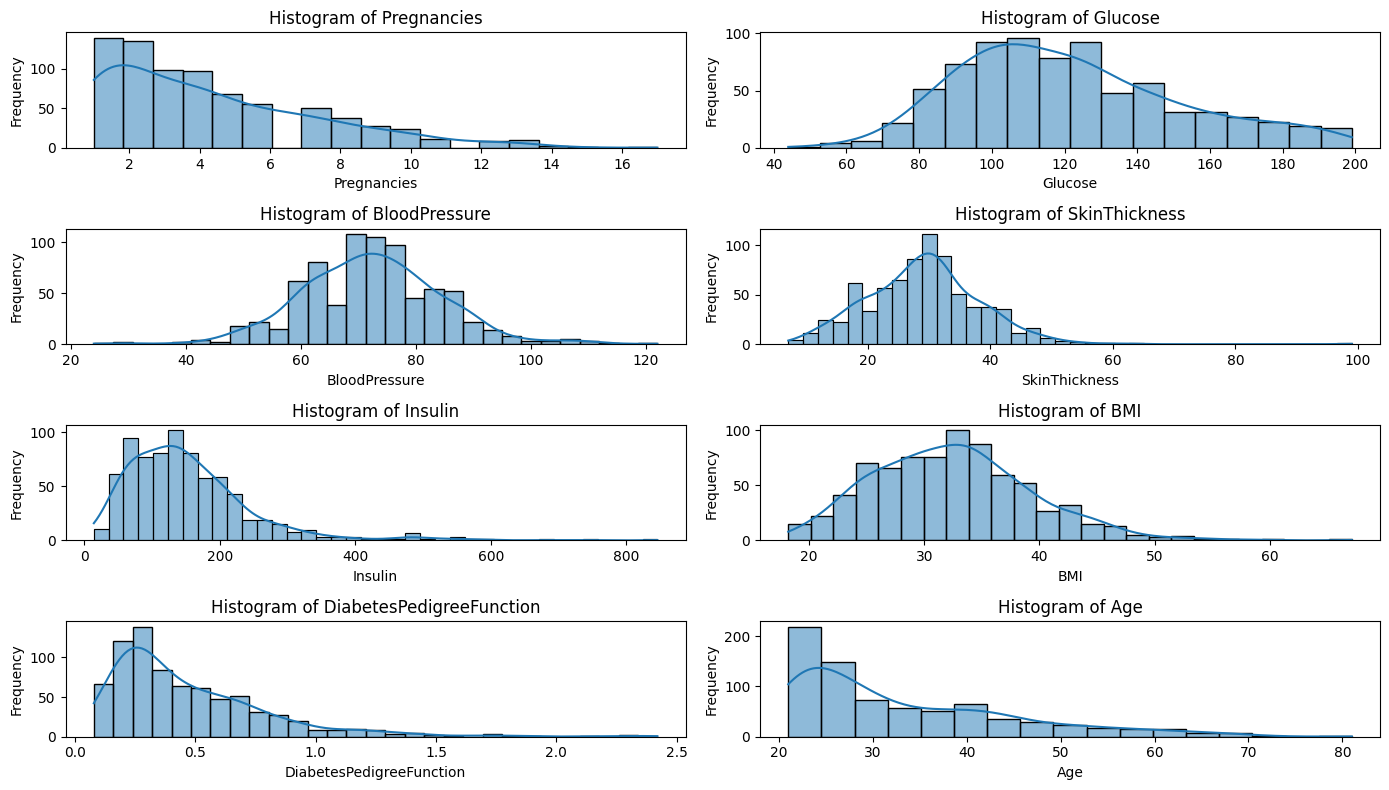

In [24]:
fig, axes = plt.subplots(4,2, figsize=(14, 8))
axes = axes.flatten()

# Plot each variable in a subplot
for i, column in enumerate(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]):
    ax = axes[i]
    sns.histplot(data[column], kde=True, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout and display the grid of plots
plt.tight_layout()
plt.show()

**Handling Outliers**

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Glucose'),
  Text(1, 0, 'BloodPressure'),
  Text(2, 0, 'SkinThickness'),
  Text(3, 0, 'Insulin'),
  Text(4, 0, 'BMI'),
  Text(5, 0, 'DiabetesPedigreeFunction'),
  Text(6, 0, 'Age')])

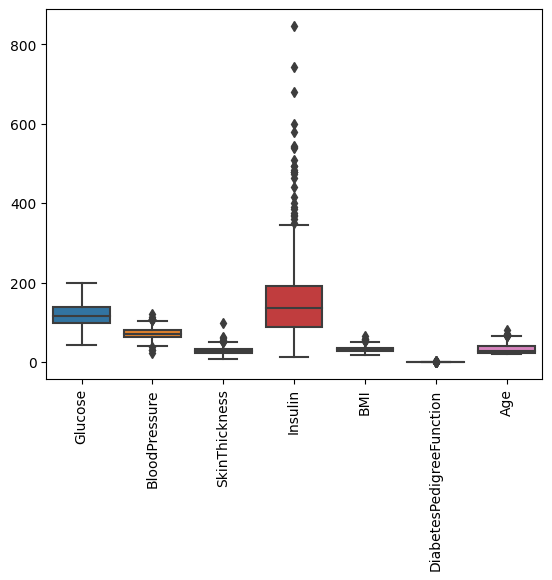

In [25]:
sns.boxplot(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])
plt.xticks(rotation=90)

In [26]:
data=data[data['Insulin']<=450]

In [27]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,196.233760,33.6,0.627,50.0,1
1,1,85.0,66.0,29.000000,67.427173,26.6,0.351,31.0,0
2,8,183.0,64.0,26.869613,192.231916,23.3,0.672,32.0,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0
4,5,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0
764,2,122.0,70.0,27.000000,159.398354,36.8,0.340,27.0,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0
766,1,126.0,60.0,30.193127,138.888105,30.1,0.349,47.0,1


In [28]:
data['Outcome'].value_counts()

0    495
1    256
Name: Outcome, dtype: int64

**SMOTE to nullify data imbalance**

In [29]:
x=data.drop('Outcome',axis=1)
y=data['Outcome'] #separating dependent and independent variables

In [30]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset to balance classes
x, y= smote.fit_resample(x, y)

In [31]:
x.shape

(990, 8)

In [32]:
y.shape

(990,)

**Feature Scaling-MinMax Scaler**

In [33]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
x=minmax.fit_transform(x)

In [34]:
x

array([[0.3125    , 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.        , 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.4375    , 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.0625    , 0.57134216, 0.49332848, ..., 0.47984096, 0.14499068,
        0.07962373],
       [0.        , 0.41967888, 0.45319789, ..., 0.3215888 , 0.24981565,
        0.15688989],
       [0.25      , 0.45056615, 0.43077761, ..., 0.40236548, 0.08635455,
        0.33693677]])

In [35]:
x=pd.DataFrame(x)

In [36]:
x

,0,1,2,3,4,5,6,7
0,0.3125,0.670968,0.489796,0.304348,0.427779,0.314928,0.234415,0.483333
1,0.0000,0.264516,0.428571,0.239130,0.125416,0.171779,0.116567,0.166667
2,0.4375,0.896774,0.408163,0.215974,0.418385,0.104294,0.253629,0.183333
3,0.0000,0.290323,0.428571,0.173913,0.187793,0.202454,0.038002,0.000000
4,0.2500,0.600000,0.163265,0.304348,0.361502,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...,...
985,0.2500,0.473895,0.516797,0.242642,0.372198,0.272819,0.241954,0.271021
986,0.1875,0.754727,0.664774,0.263112,0.367291,0.263572,0.218905,0.629274
987,0.0625,0.571342,0.493328,0.355829,0.431472,0.479841,0.144991,0.079624
988,0.0000,0.419679,0.453198,0.206886,0.186902,0.321589,0.249816,0.156890


**Splitting dataset into train and test**

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Logistic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression()
lr_clf.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_predictions=lr_clf.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

In [41]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.7373737373737373
Precision= 0.7399980194097842
recall_score= 0.7373737373737373
f1_score= 0.737480931766646


array([[74, 30],
       [22, 72]])

**K-Nearest Neighbors**

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
metric_k=[]
neighbors=np.arange(3,15)

In [44]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

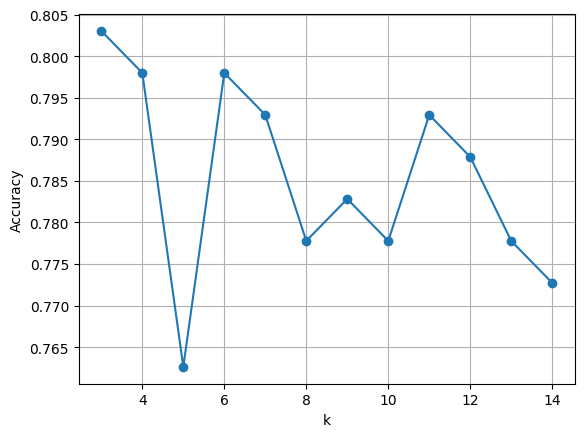

In [45]:
plt.plot(neighbors,metric_k,'o-')
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.grid()

In [46]:
classifier=KNeighborsClassifier(n_neighbors=2,metric='euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [47]:
y_predictions=classifier.predict(x_test)

In [48]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.797979797979798
Precision= 0.7984618916437096
recall_score= 0.797979797979798
f1_score= 0.7974818535566199


array([[87, 17],
       [23, 71]])

**SVM**

In [49]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [50]:
y_prediction=svmclf.predict(x_test)

In [51]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.797979797979798
Precision= 0.7984618916437096
recall_score= 0.797979797979798
f1_score= 0.7974818535566199


array([[87, 17],
       [23, 71]])

**Decision Trees**

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
y_predictions=dt_clf.predict(x_test)

In [54]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.7626262626262627
Precision= 0.7672174897981349
recall_score= 0.7626262626262627
f1_score= 0.7625596577462507


array([[75, 29],
       [18, 76]])

**Random Forest**

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
y_predictions=rf_clf.predict(x_test)

In [57]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.8181818181818182
Precision= 0.8239988067715713
recall_score= 0.8181818181818182
f1_score= 0.8180705009276438


array([[80, 24],
       [12, 82]])

**AdaBoost Classifier**

In [58]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [59]:
y_predictions = ada.predict(x_test)

In [60]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.7626262626262627
Precision= 0.7647878189880842
recall_score= 0.7626262626262627
f1_score= 0.7627534433504582


array([[77, 27],
       [20, 74]])

**GradientBoost Classifier**

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [62]:
y_predictions=gb.predict(x_test)

In [63]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.8080808080808081
Precision= 0.8122137909371953
recall_score= 0.8080808080808081
f1_score= 0.8080808080808081


array([[80, 24],
       [14, 80]])

**Catboost Classifier**

In [64]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [65]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()

In [ ]:
model.fit(x_train, y_train)

In [67]:
y_predictions=model.predict(x_test)

In [68]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.8131313131313131
Precision= 0.8180638954832503
recall_score= 0.8131313131313131
f1_score= 0.8130788795023675


array([[80, 24],
       [13, 81]])

**Naive Bayes Classifier**

In [69]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [70]:
y_predictions=gnb.predict(x_test)

In [71]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('recall_score=',recall_score(y_test,y_predictions,average='weighted'))
print('f1_score=',f1_score(y_test,y_predictions,average='weighted'))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.7424242424242424
Precision= 0.7456155835307597
recall_score= 0.7424242424242424
f1_score= 0.7424833751900558


array([[74, 30],
       [21, 73]])